In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import joblib
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss, ccf


In [37]:
df = pd.read_csv("energy_dataset.csv")

In [38]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [40]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [41]:
df.fillna(0, inplace=True)


In [42]:
df.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage aggregated     0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offs

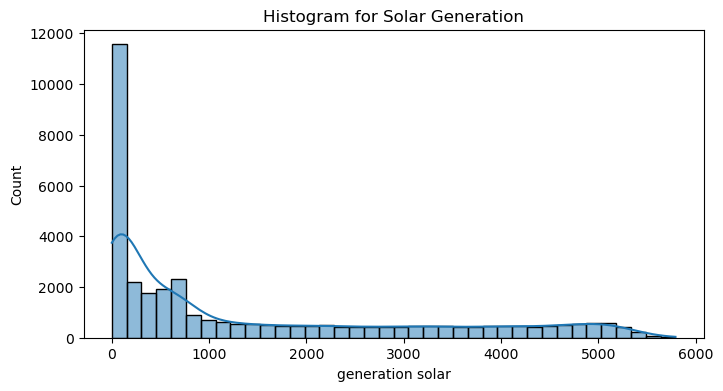

In [43]:
plt.figure(figsize=(8, 4))
sns.histplot(df['generation solar'], kde=True)
plt.title('Histogram for Solar Generation')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20120\3314561423.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price actual'], shade=True)


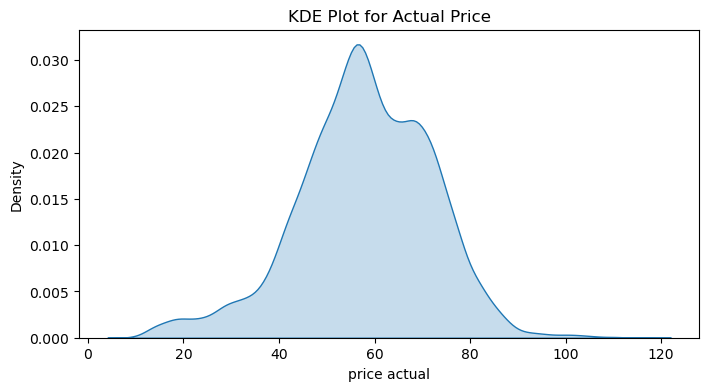

In [9]:
# 2. KDE Plot for a single column
plt.figure(figsize=(8, 4))
sns.kdeplot(df['price actual'], shade=True)
plt.title('KDE Plot for Actual Price')
plt.show()

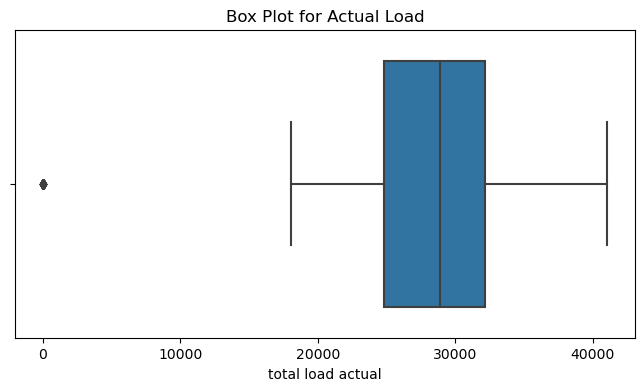

In [10]:
# 3. Box Plot for a single column
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['total load actual'])
plt.title('Box Plot for Actual Load')
plt.show();

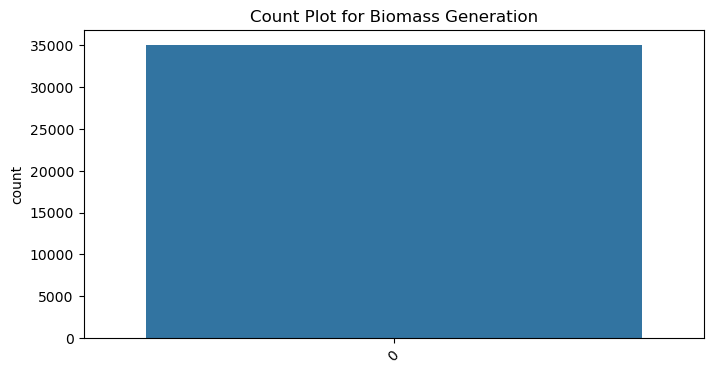

In [11]:
# 4. Count Plot for a categorical column
plt.figure(figsize=(8, 4))
sns.countplot(df['generation biomass'])
plt.title('Count Plot for Biomass Generation')
plt.xticks(rotation=45)
plt.show()

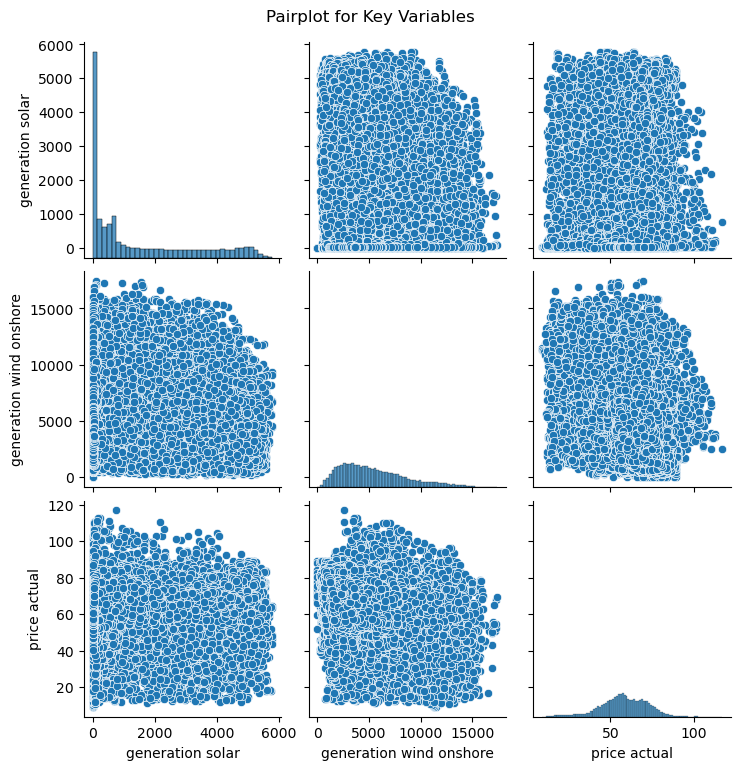

In [12]:
# 5. Pairplot for multiple numerical columns
sns.pairplot(df[['generation solar', 'generation wind onshore', 'price actual']])
plt.suptitle('Pairplot for Key Variables', y=1.02)
plt.show()

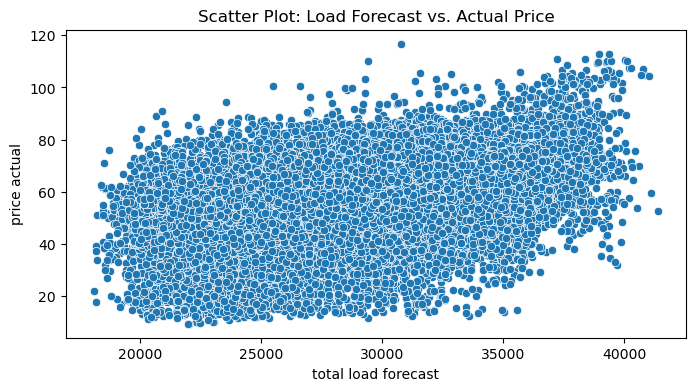

In [13]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['total load forecast'], y=df['price actual'])
plt.title('Scatter Plot: Load Forecast vs. Actual Price')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20120\1185076372.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


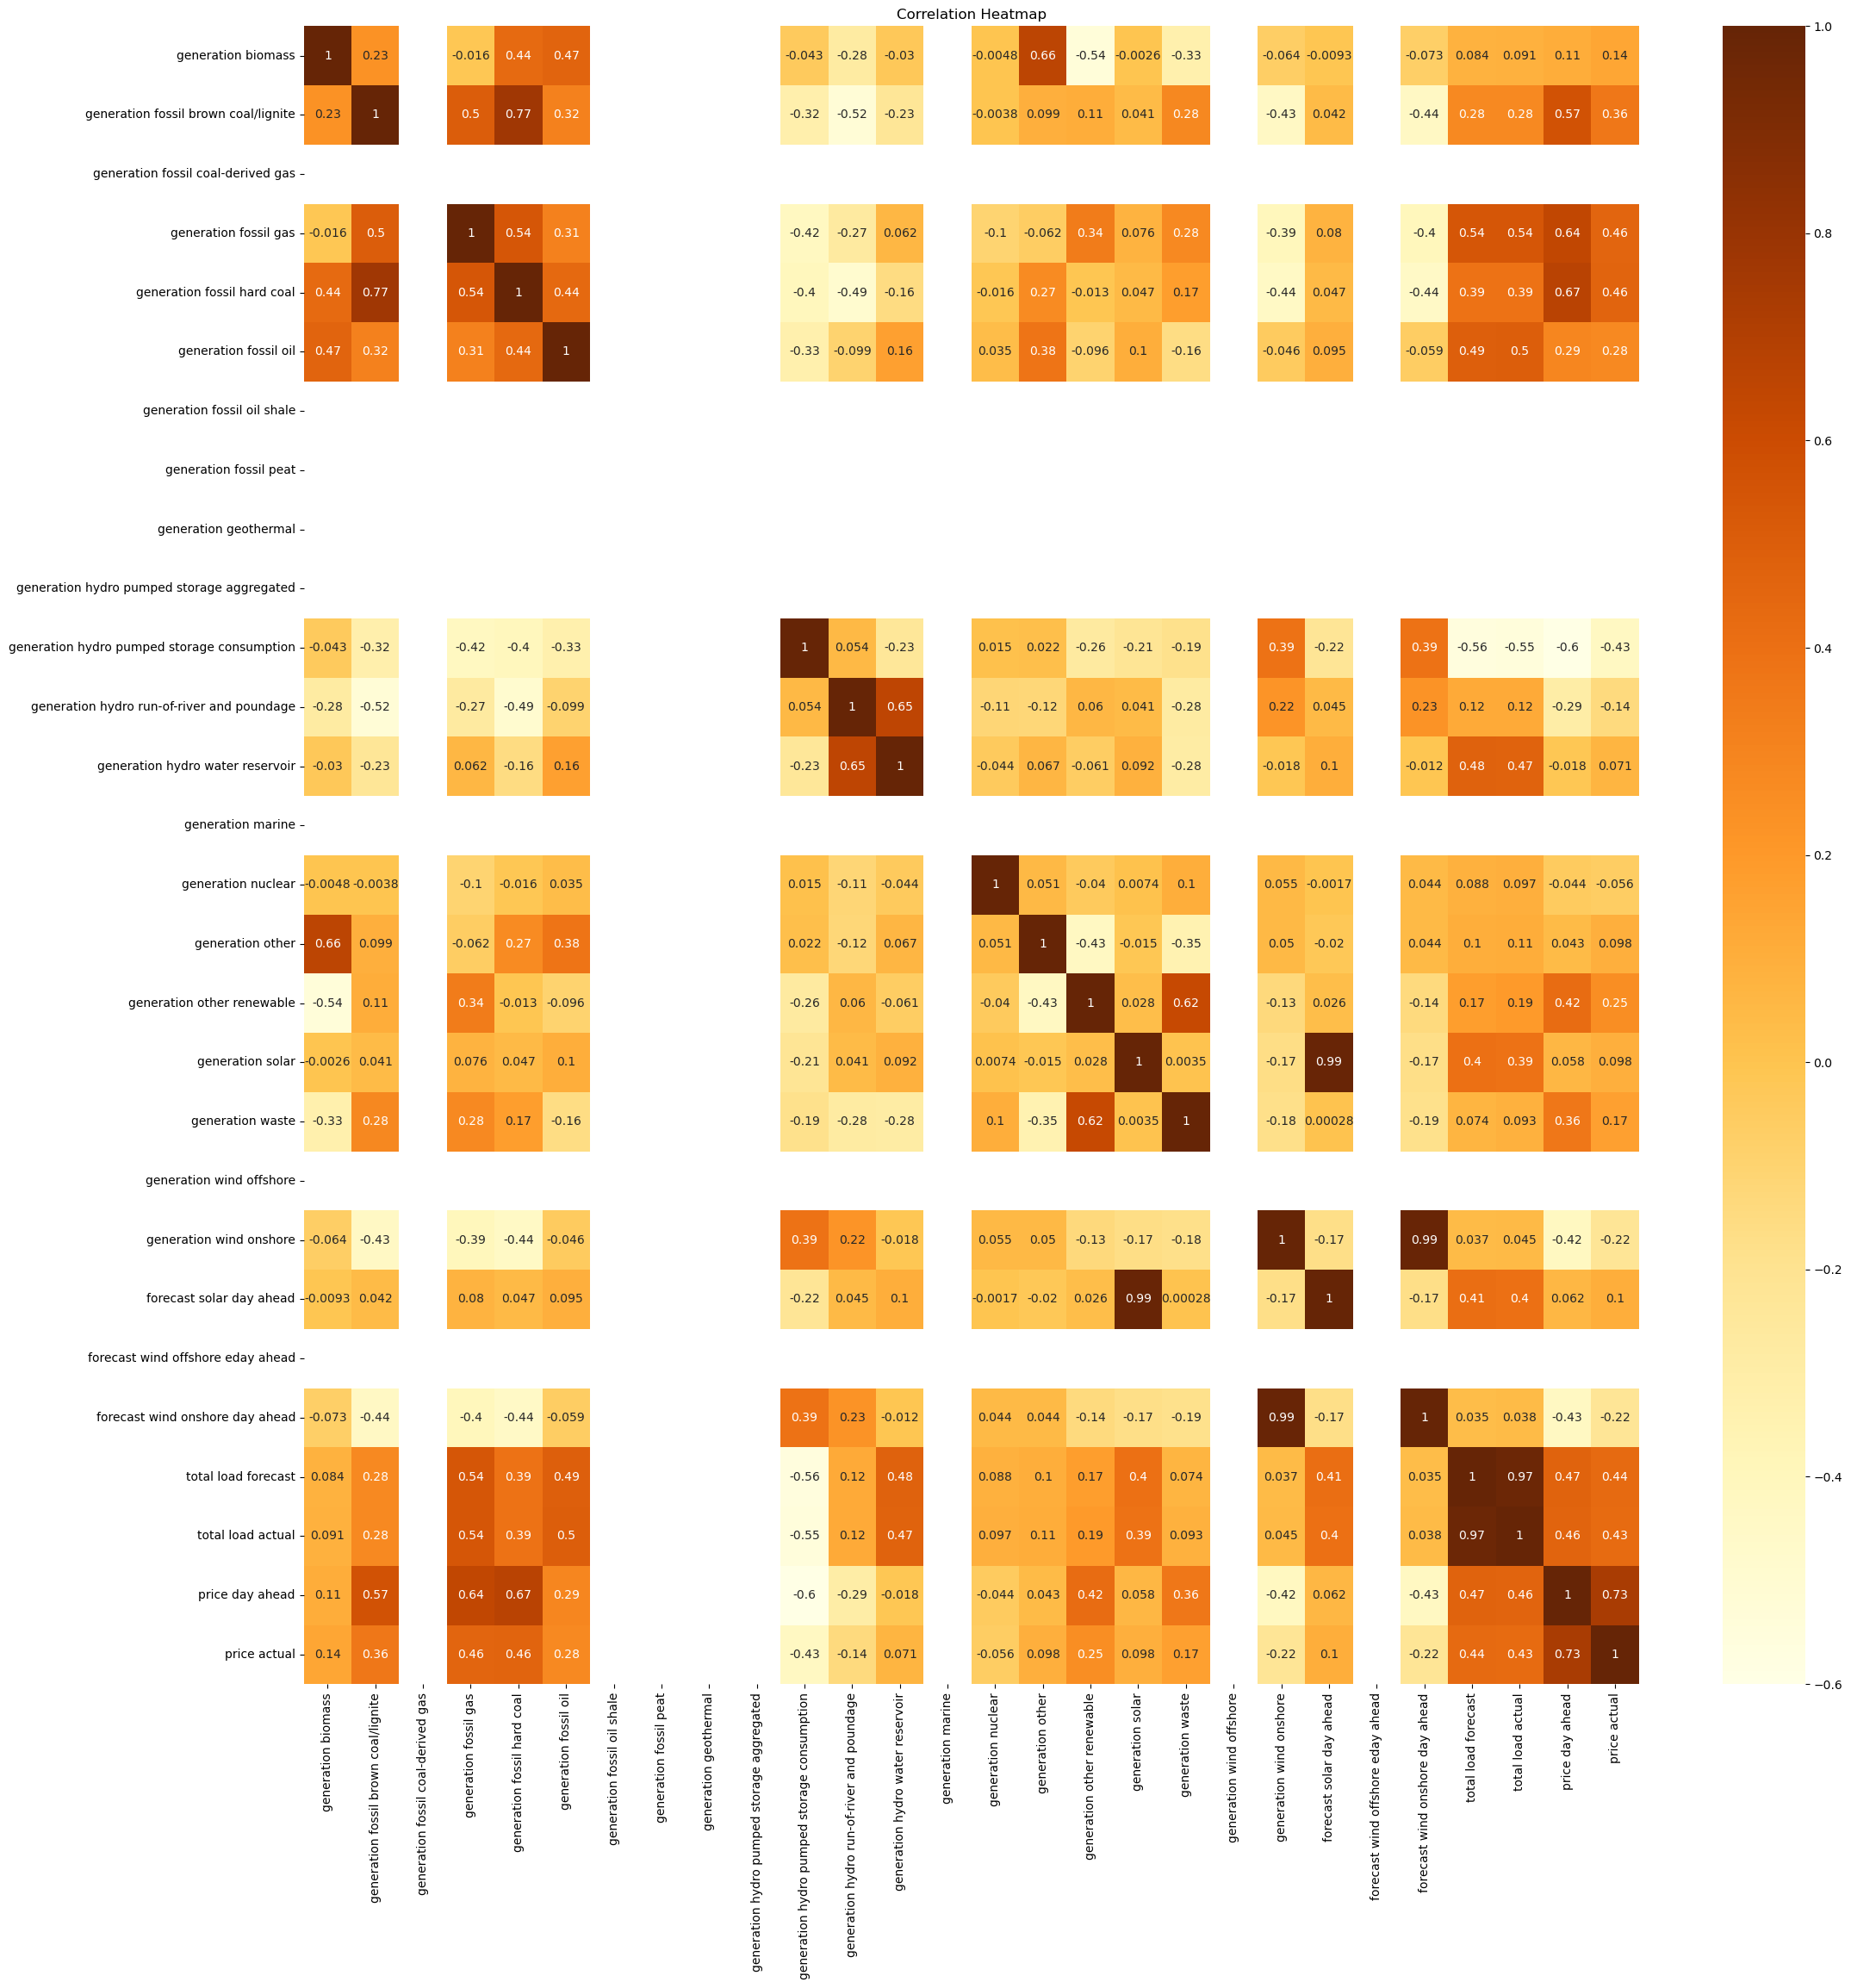

In [14]:
# 7. Heatmap for correlation between numerical variables
plt.figure(figsize=(25, 25))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlOrBr')
plt.title('Correlation Heatmap')
plt.show();



C:\Users\ASUS\AppData\Local\Temp\ipykernel_20120\3184052691.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['generation solar'], y=df['price actual'], ci=None)


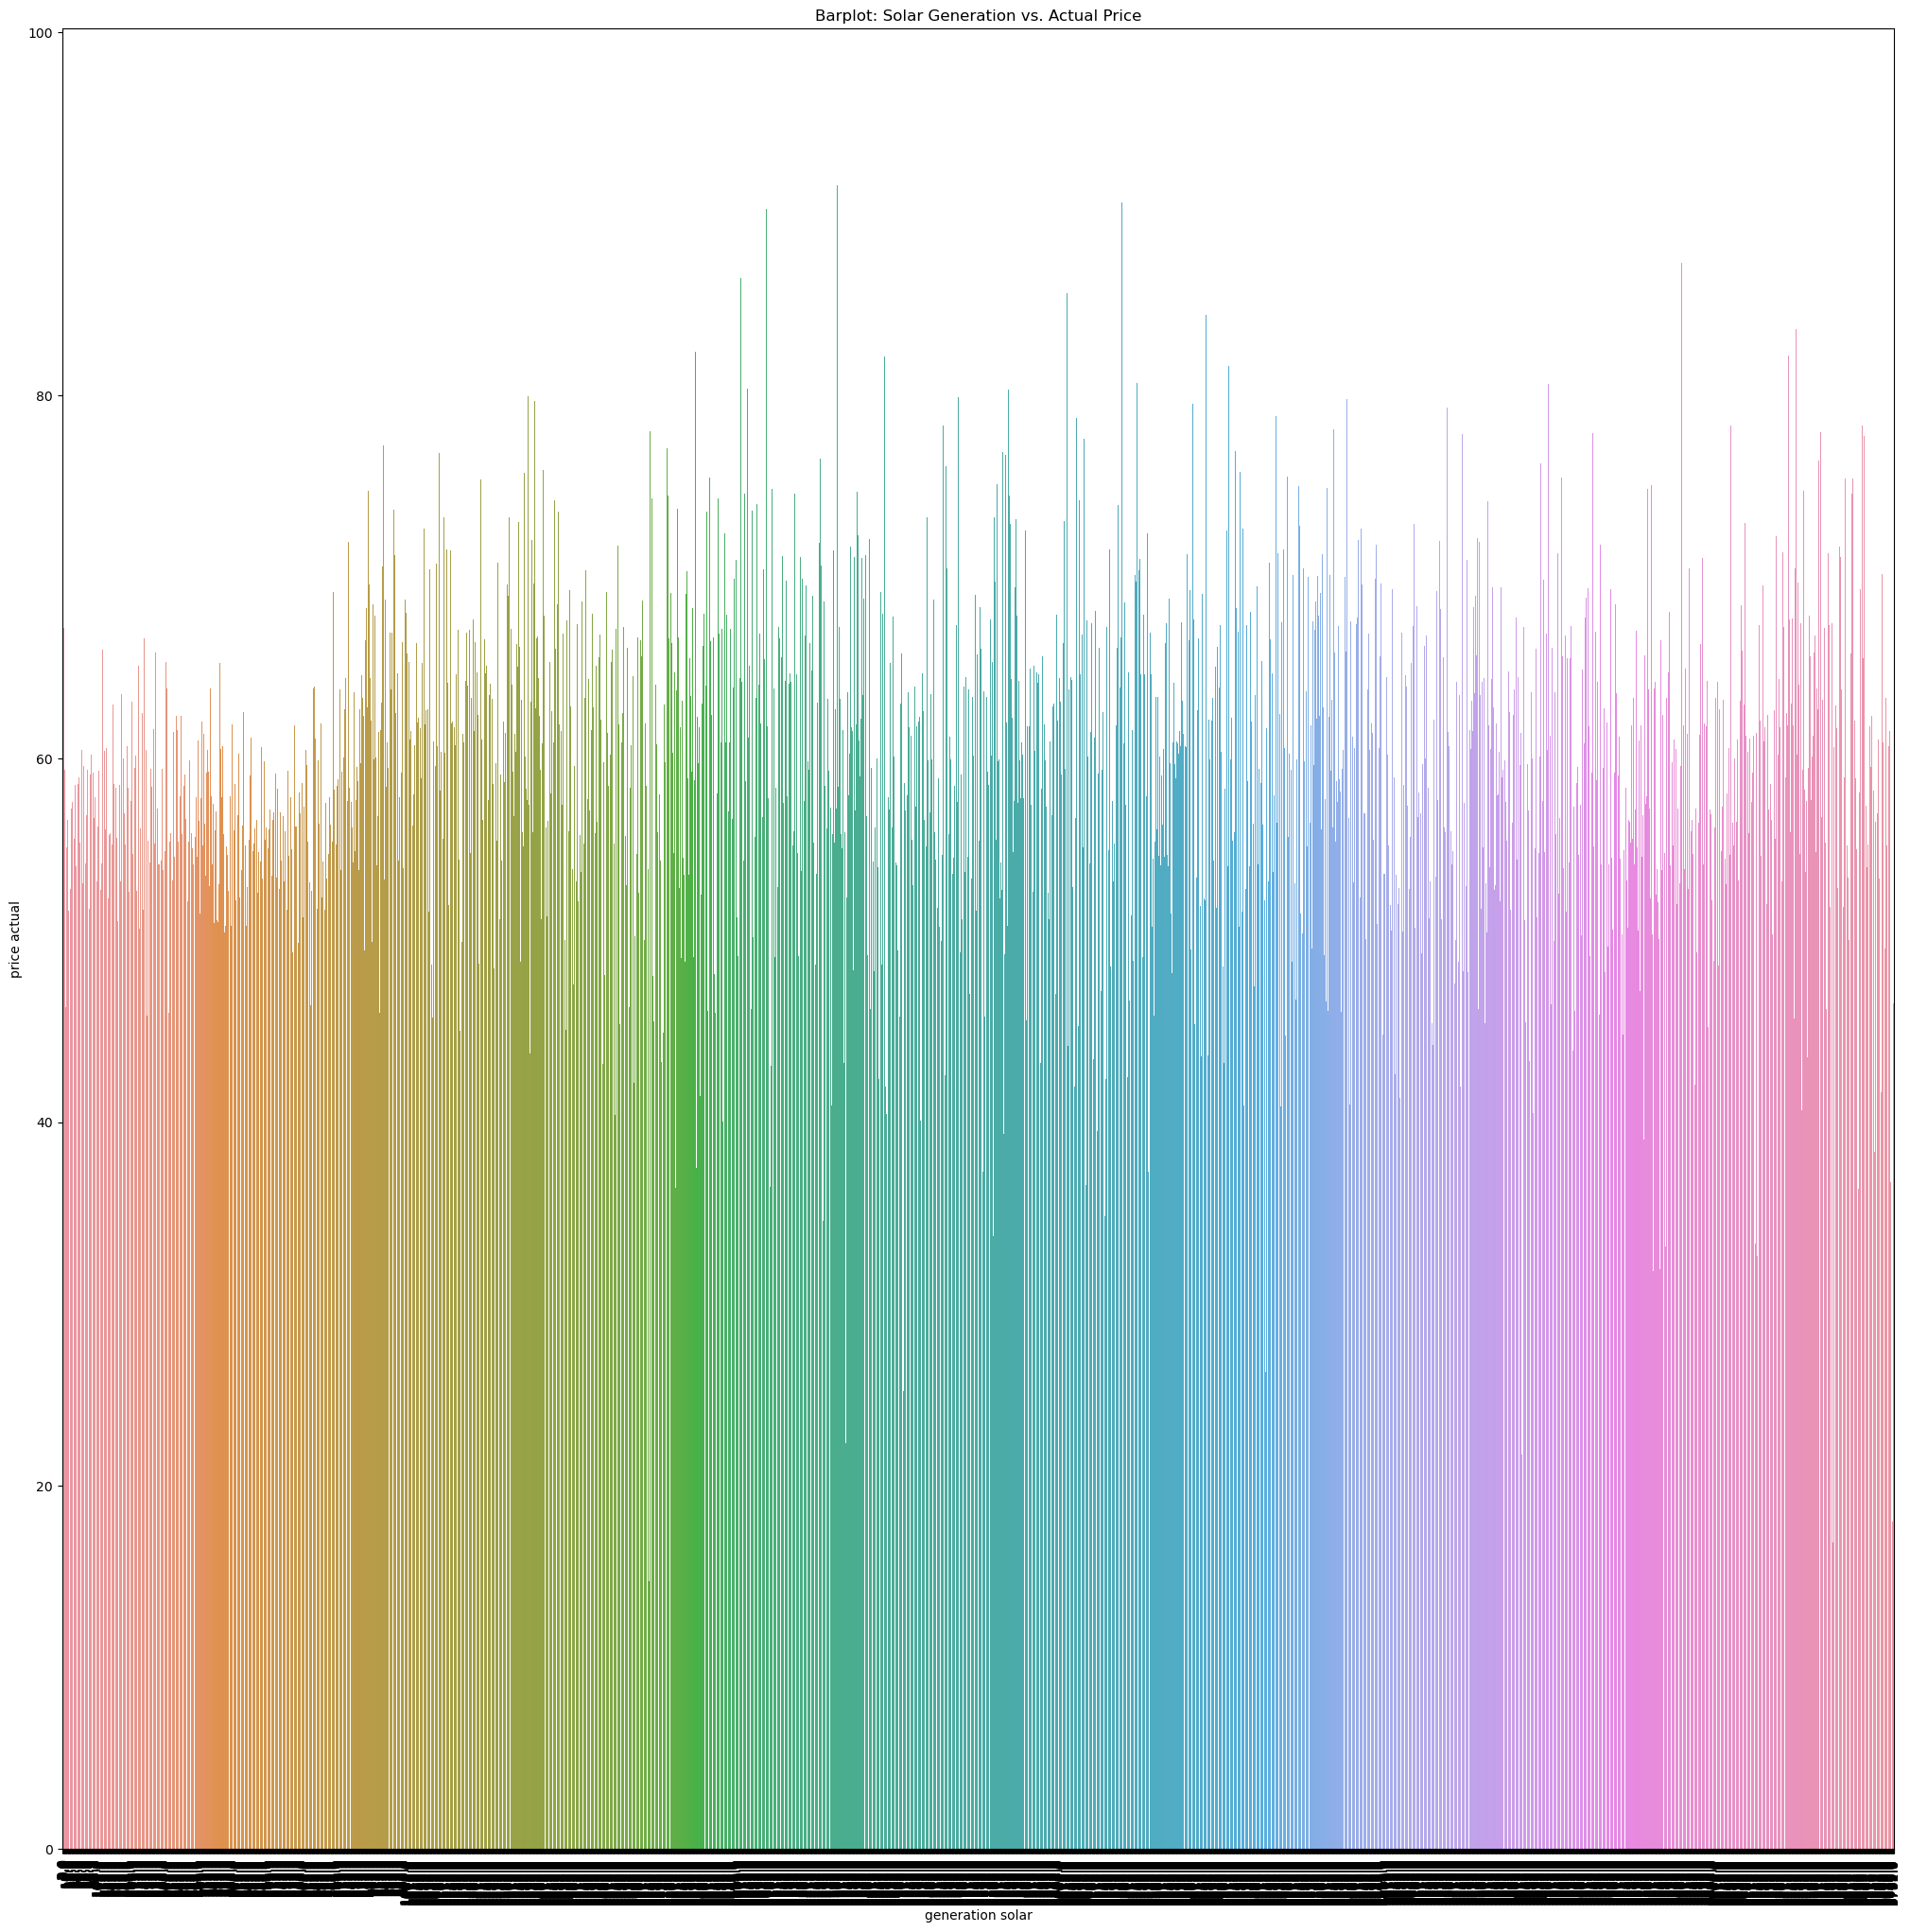

In [15]:
plt.figure(figsize=(25, 25))
sns.barplot(x=df['generation solar'], y=df['price actual'], ci=None)
plt.title('Barplot: Solar Generation vs. Actual Price')
plt.xticks(rotation=90)
plt.show()

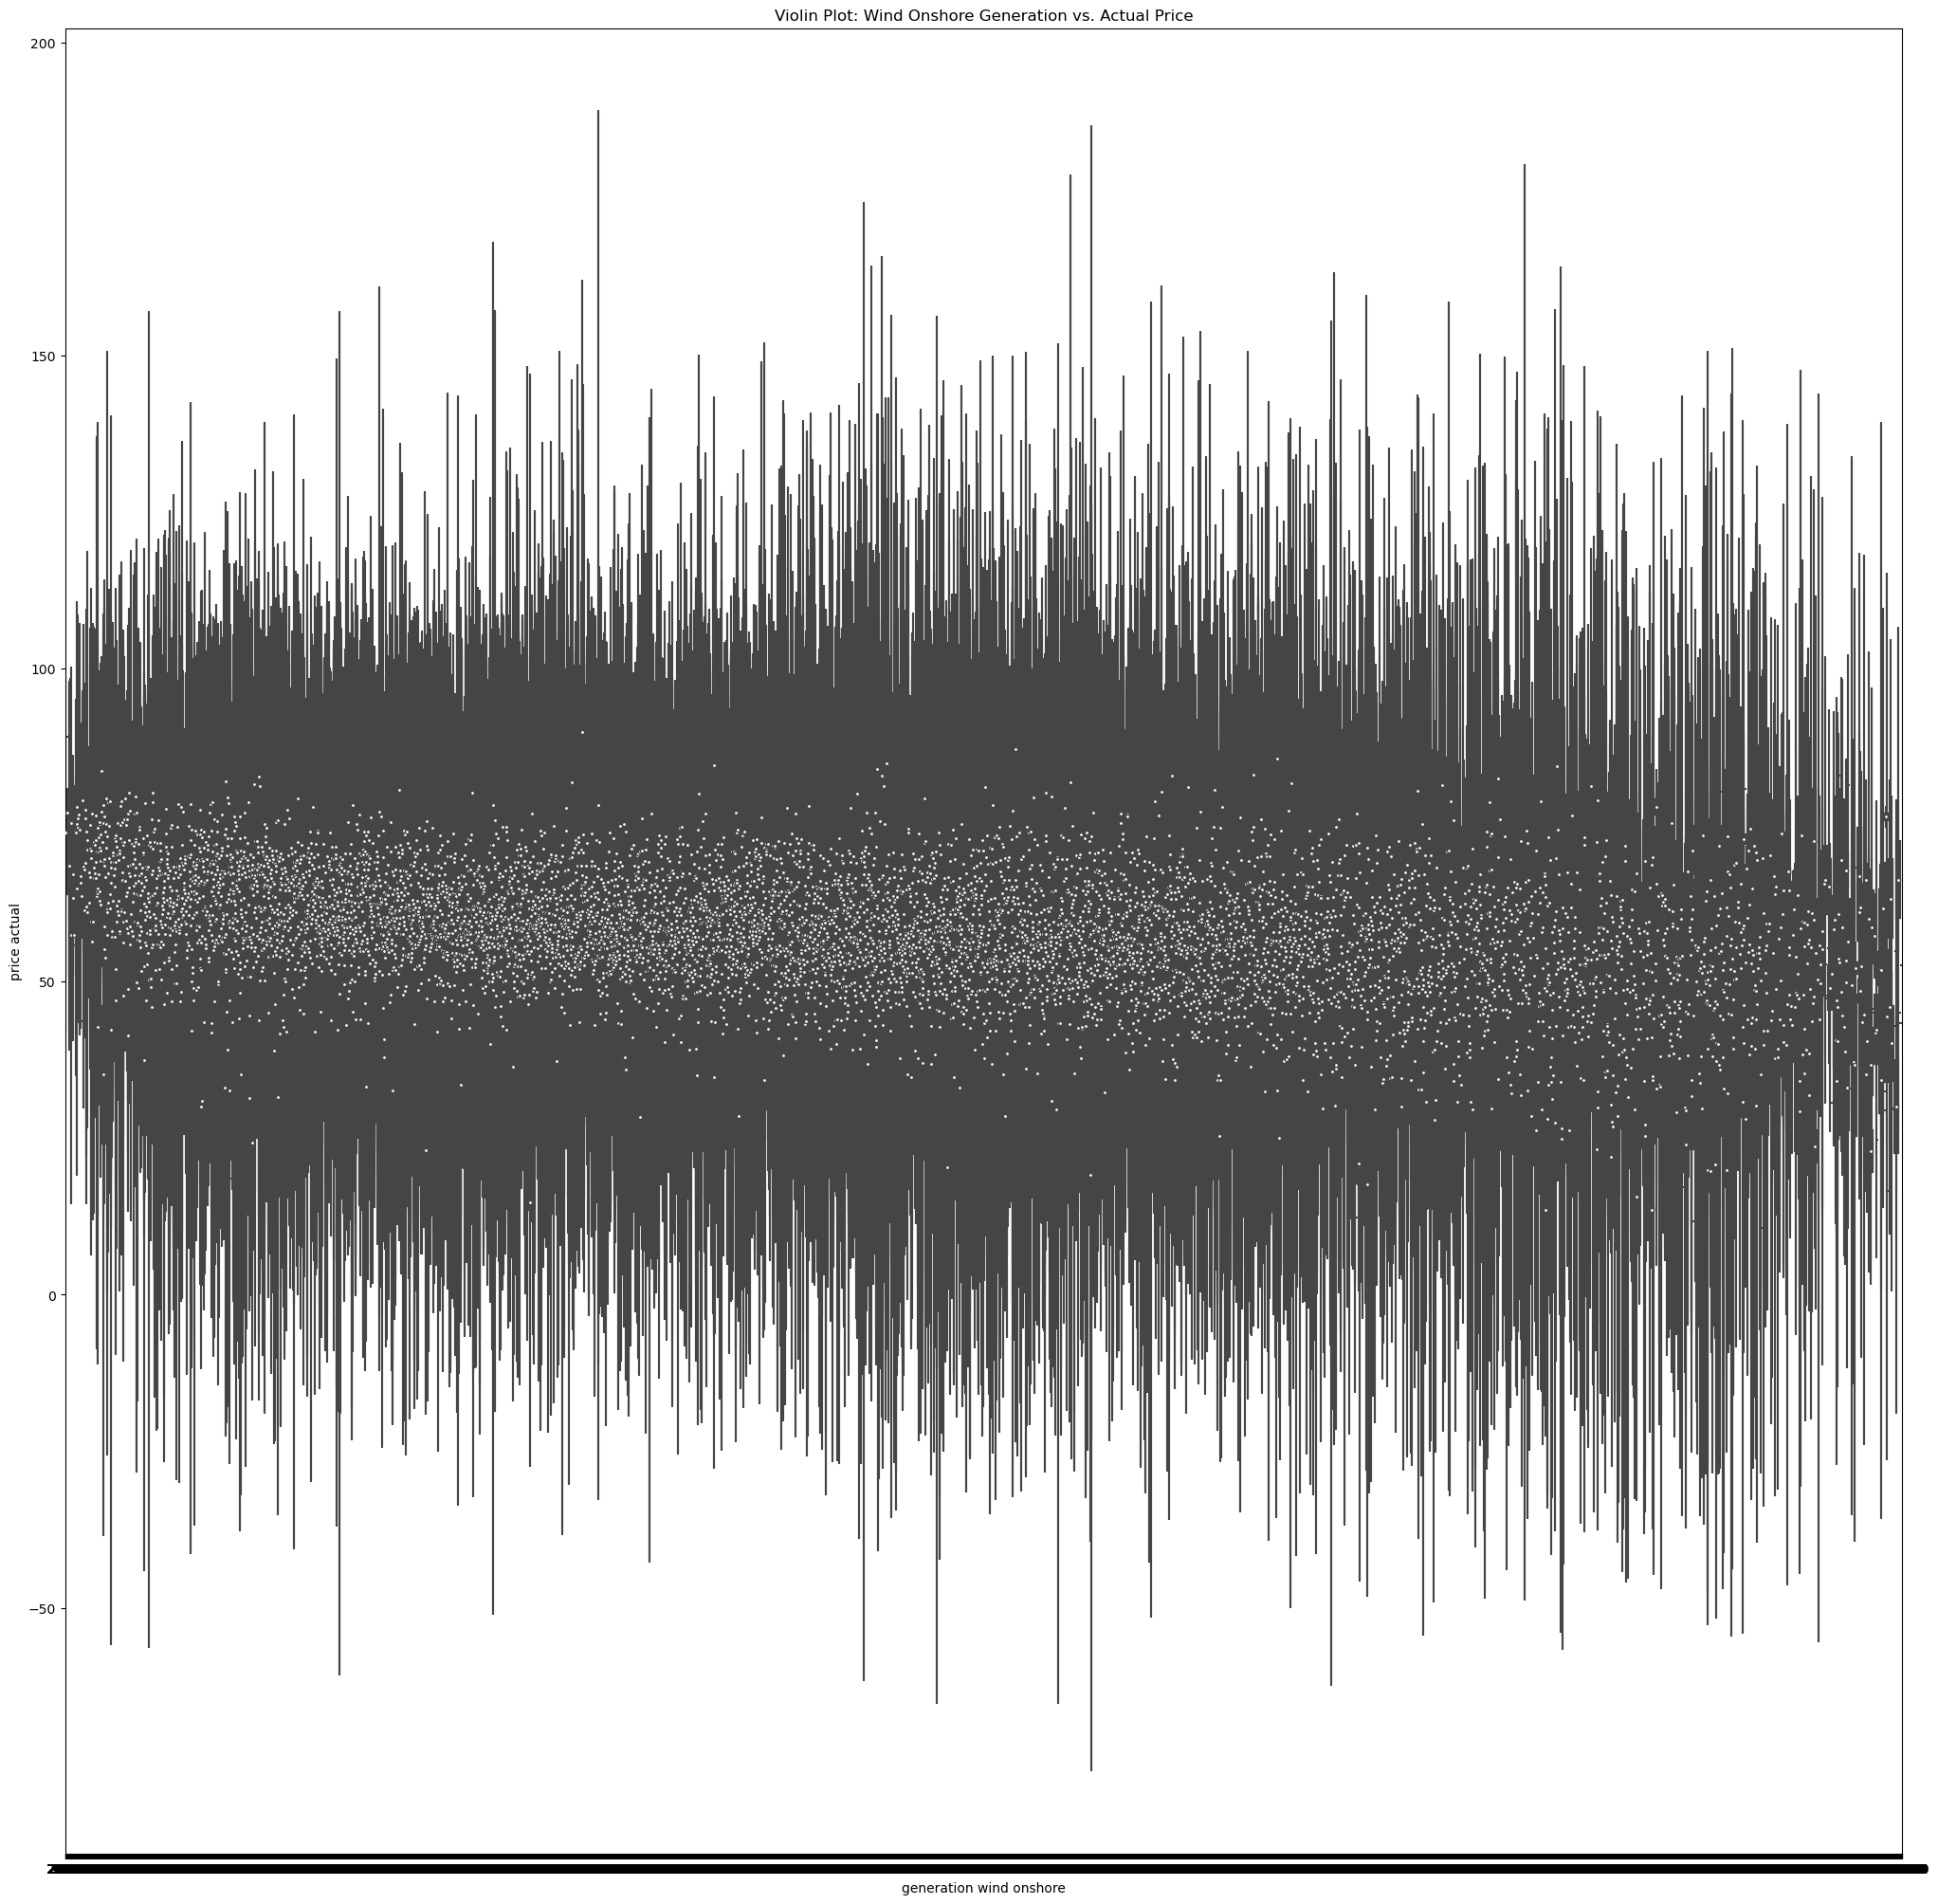

In [16]:
plt.figure(figsize=(25, 25))
sns.violinplot(x=df['generation wind onshore'], y=df['price actual'])
plt.title('Violin Plot: Wind Onshore Generation vs. Actual Price')
plt.show()

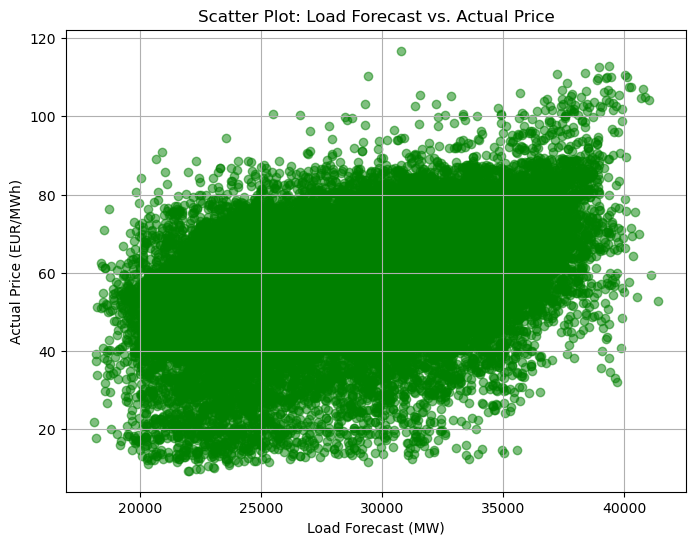

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(df['total load forecast'], df['price actual'], alpha=0.5, color='green')
plt.title('Scatter Plot: Load Forecast vs. Actual Price')
plt.xlabel('Load Forecast (MW)')
plt.ylabel('Actual Price (EUR/MWh)')
plt.grid(True)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20120\938751802.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['generation wind onshore'], y=df['price actual'], ci=None)


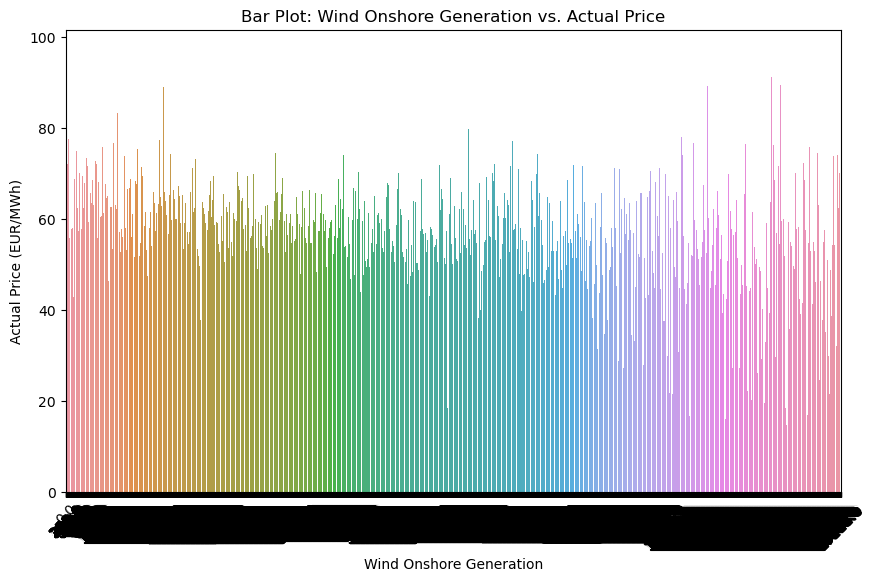

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['generation wind onshore'], y=df['price actual'], ci=None)
plt.title('Bar Plot: Wind Onshore Generation vs. Actual Price')
plt.xticks(rotation=45)
plt.xlabel('Wind Onshore Generation')
plt.ylabel('Actual Price (EUR/MWh)')
plt.show()

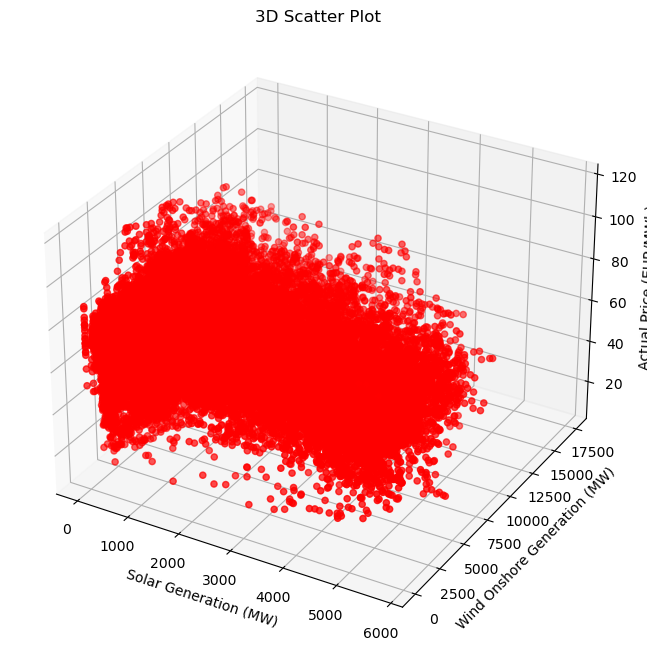

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Replace with the actual column names from your dataset
x = df['generation solar']
y = df['generation wind onshore']
z = df['price actual']

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Solar Generation (MW)')
ax.set_ylabel('Wind Onshore Generation (MW)')
ax.set_zlabel('Actual Price (EUR/MWh)')
ax.set_title('3D Scatter Plot')

plt.show()

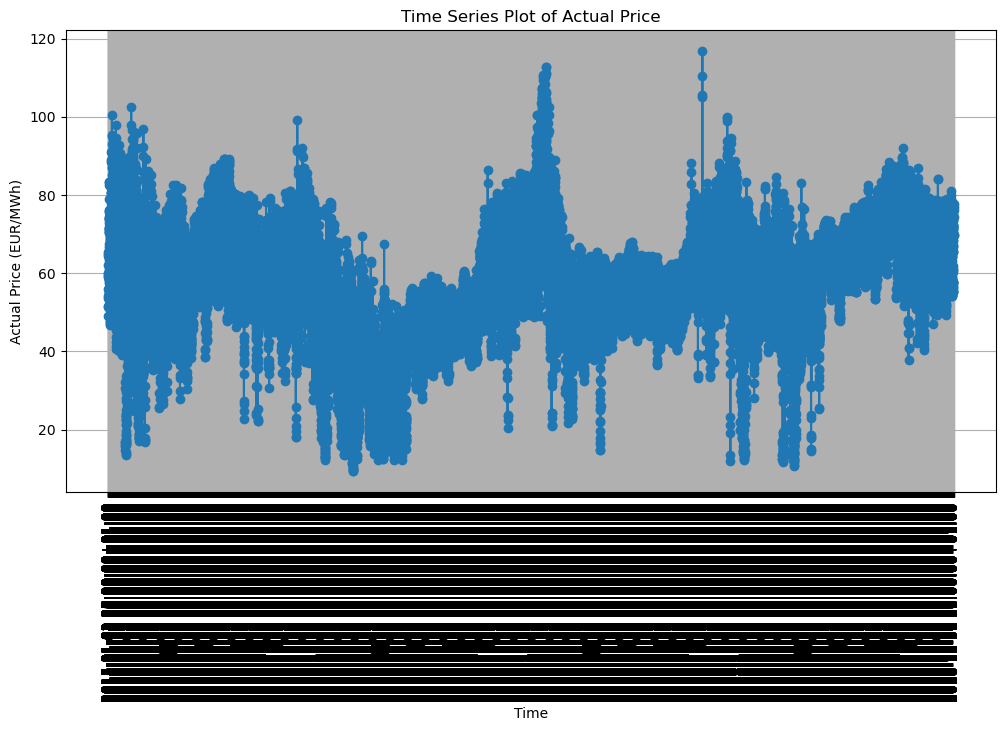

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['price actual'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Actual Price (EUR/MWh)')
plt.title('Time Series Plot of Actual Price')
plt.grid(True)
plt.xticks(rotation=90)
plt.show();

In [44]:
df = df.drop(['generation fossil coal-derived gas','generation fossil oil shale',
                            'generation fossil peat', 'generation geothermal',
                            'generation hydro pumped storage aggregated', 'generation marine',
                            'generation wind offshore', 'forecast wind offshore eday ahead',
                            'total load forecast', 'forecast solar day ahead',
                            'forecast wind onshore day ahead'],
                            axis=1)

In [7]:
df.describe().round(2)


,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
count,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00
mean,383.31,447.83,5619.85,4253.88,298.16,475.32,971.59,2603.78,6260.87,60.20,85.60,1431.93,269.31,5461.67,28667.48,49.87,57.88
std,85.80,354.62,2204.95,1963.47,52.96,792.27,401.31,1835.68,850.71,20.28,14.21,1680.00,50.57,3215.25,4664.08,14.62,14.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.06,9.33
25%,333.00,0.00,4125.00,2524.75,263.00,0.00,637.00,1076.00,5757.00,53.00,73.00,70.00,240.00,2930.75,24800.00,41.49,49.35
50%,367.00,509.00,4968.00,4473.00,300.00,67.00,905.00,2163.00,6563.50,57.00,88.00,615.00,279.00,4847.00,28894.00,50.52,58.02
75%,433.00,757.00,6428.00,5837.00,330.00,615.00,1250.00,3756.25,7024.00,80.00,97.00,2575.25,310.00,7397.00,32186.25,60.53,68.01
max,592.00,999.00,20034.00,8359.00,449.00,4523.00,2000.00,9728.00,7117.00,106.00,119.00,5792.00,357.00,17436.00,41015.00,101.99,116.80


In [45]:
df['time'] = pd.to_datetime(df['time'], utc=True, infer_datetime_format=True)
df = df.set_index('time')
df

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,68.85,77.02
2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0,68.40,76.16
2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0,66.88,74.30


In [46]:
def plot_series(df=None, column=None, series=pd.Series([]),label=None, ylabel=None, title=None, start=0, end=None):

  sns.set()
  fig, ax = plt.subplots(figsize=(30, 12))
  ax.set_xlabel('Time', fontsize=16)
  if column:
    ax.plot(df[column][start:end], label=label)
    ax.set_ylabel(ylabel, fontsize=16)
  if series.any():
    ax.plot(series, label=label)
    ax.set_ylabel(ylabel, fontsize=16)
  if label:
    ax.legend(fontsize=16)
  if title:
    ax.set_title(title, fontsize=24)
    ax.grid(True)
  return ax

C:\Users\ASUS\AppData\Local\Temp\ipykernel_44696\1560427922.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plot_series(df=None, column=None, series=pd.Series([]),label=None, ylabel=None, title=None, start=0, end=None):


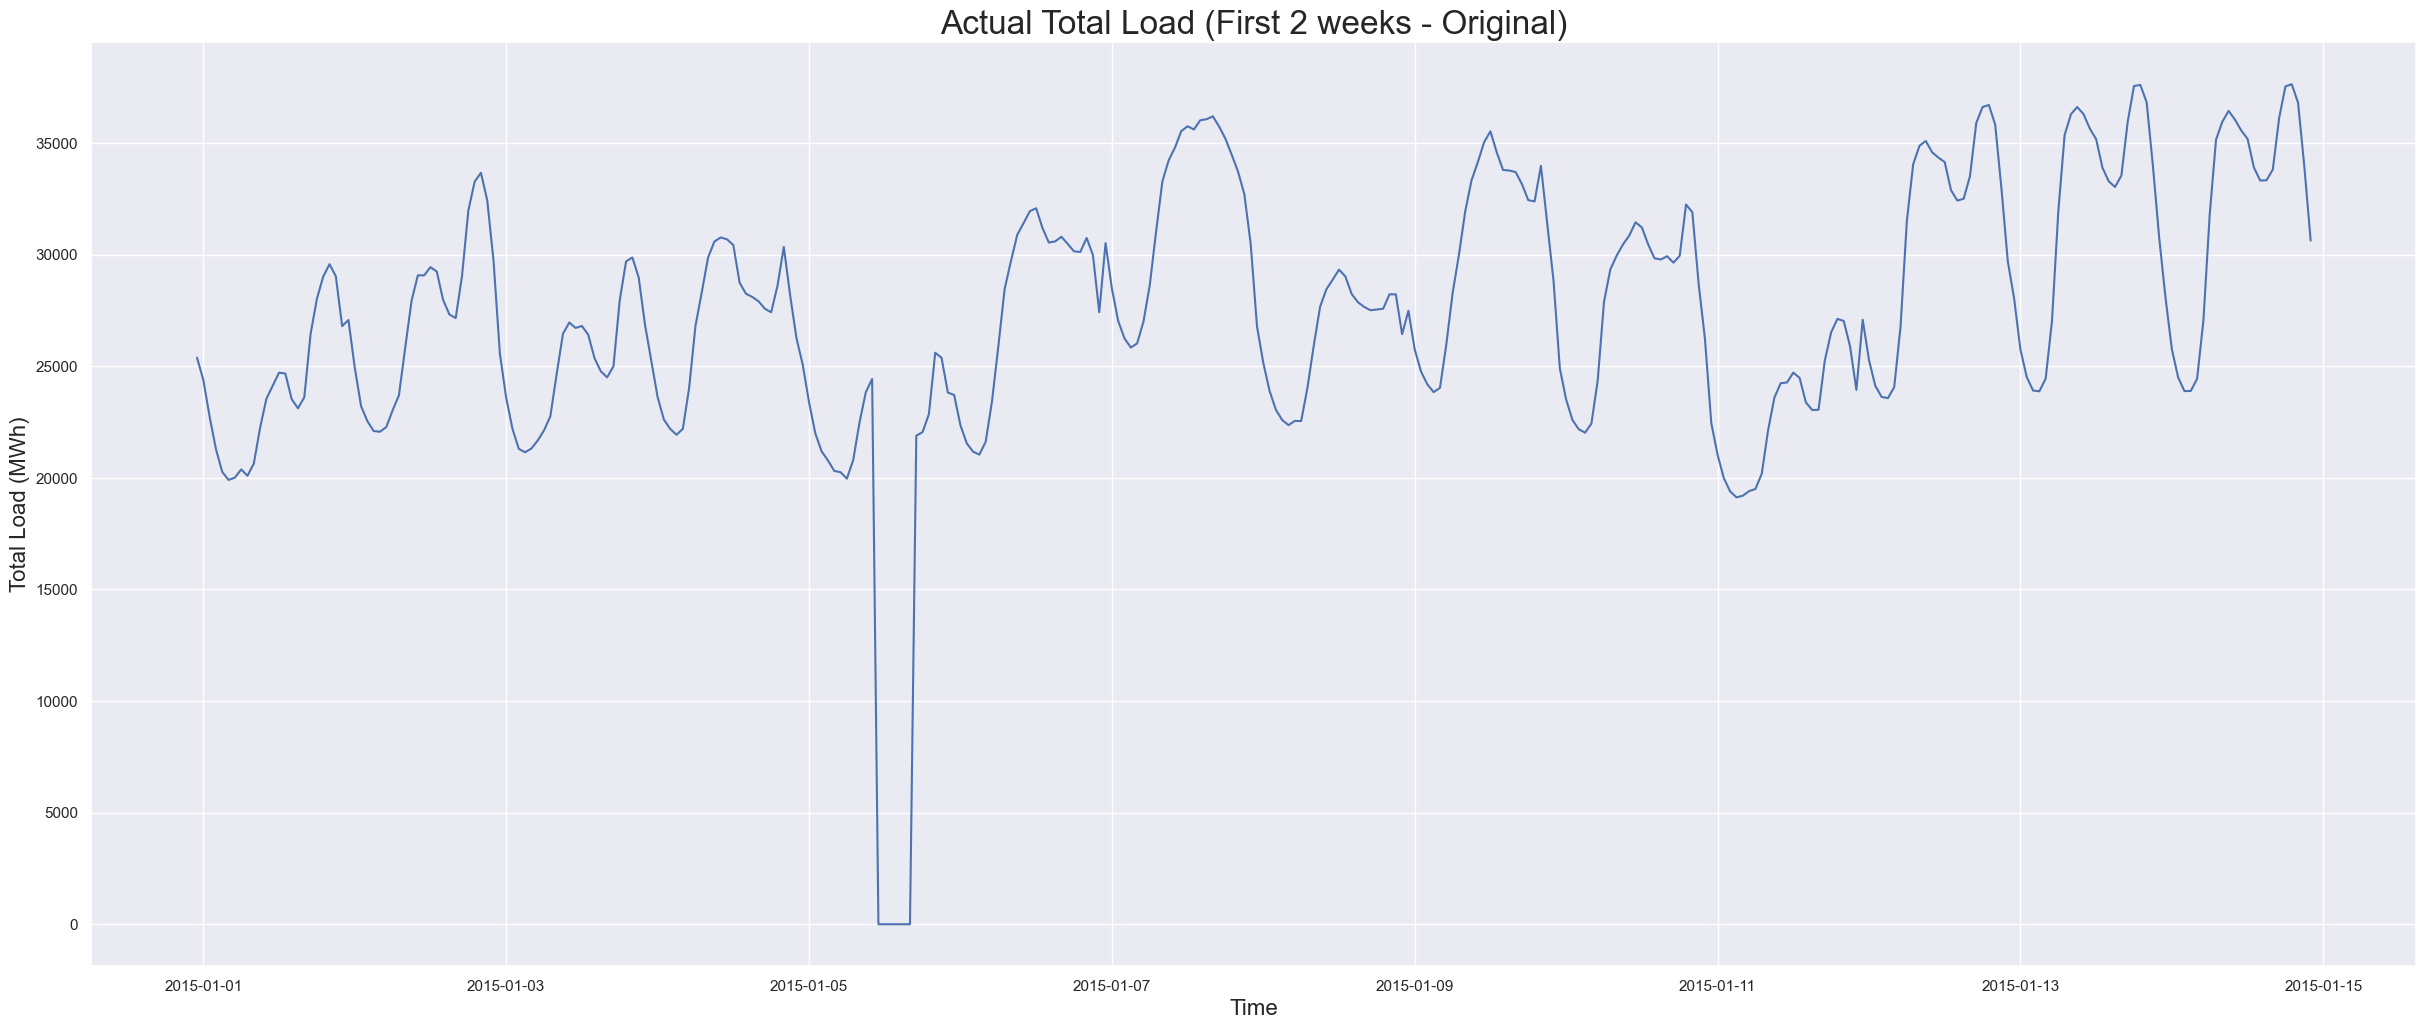

In [47]:
ax = plot_series(df=df, column='total load actual', ylabel='Total Load (MWh)',
                 title='Actual Total Load (First 2 weeks - Original)', end=24*7*2)
plt.show()

In [26]:
print('Non-zero values in each column:\n', df.astype(bool).sum(axis=0), sep='\n')


Non-zero values in each column:

generation biomass                             35041
generation fossil brown coal/lignite           24529
generation fossil gas                          35045
generation fossil hard coal                    35043
generation fossil oil                          35042
generation hydro pumped storage consumption    22438
generation hydro run-of-river and poundage     35042
generation hydro water reservoir               35043
generation nuclear                             35044
generation other                               35042
generation other renewable                     35043
generation solar                               35043
generation waste                               35042
generation wind onshore                        35043
total load actual                              35028
price day ahead                                35064
price actual                                   35064
dtype: int64


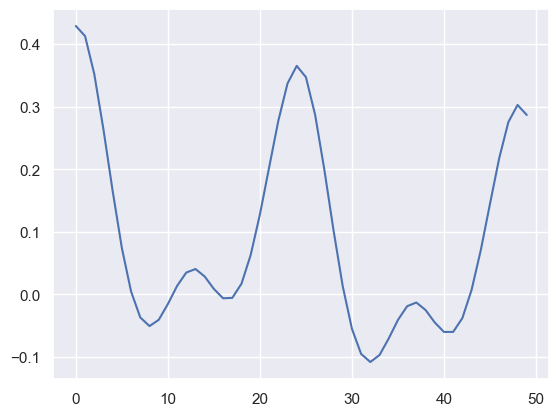

In [27]:
cross_corr = ccf(df['total load actual'], df['price actual'])
plt.plot(cross_corr[0:50])
plt.show()

In [48]:
 df
 df = df.drop([ "generation hydro water reservoir","generation nuclear","generation other","generation solar","generation waste","generation biomass","generation hydro run-of-river and poundage"], axis=1)
                           
df['generation coal all'] = df['generation fossil hard coal'] + df['generation fossil brown coal/lignite']
df.drop(['generation fossil hard coal', 'generation fossil brown coal/lignite',], axis=1, inplace=True)
df['generation fossill all'] = df['generation fossil gas'] + df['generation fossil oil']
df.drop(['generation fossil gas', 'generation fossil oil',], axis=1, inplace=True)


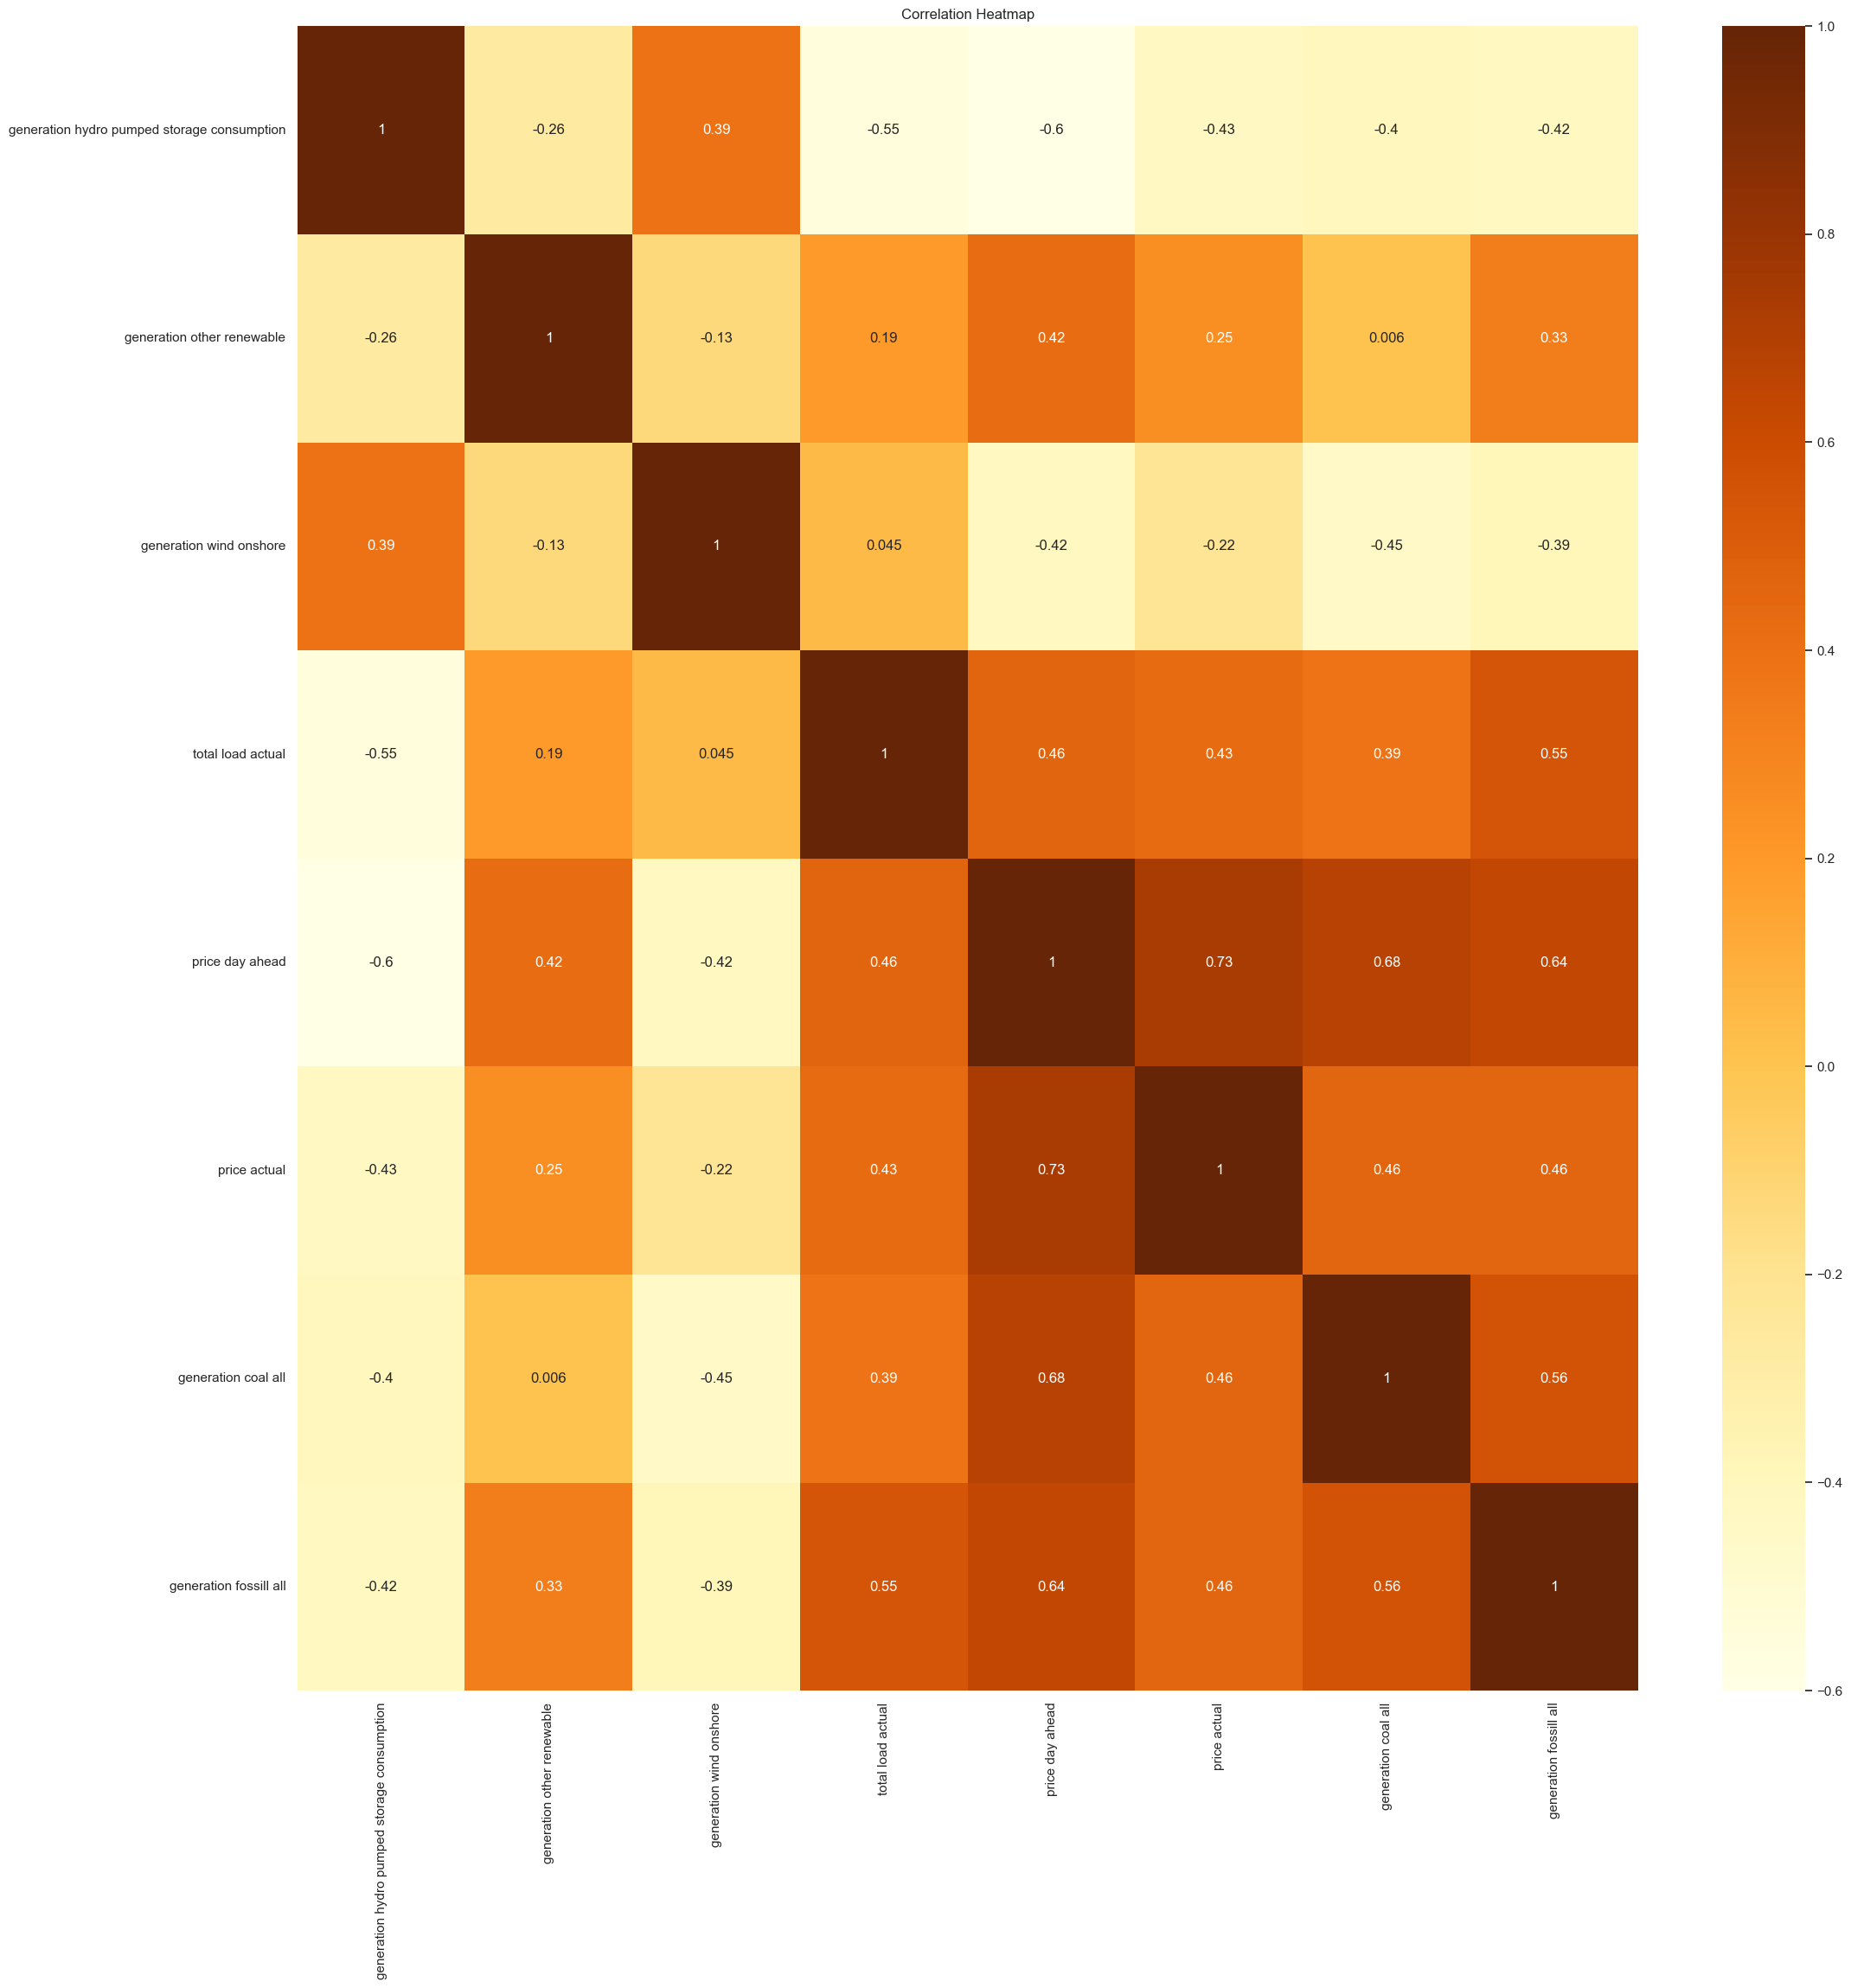

In [49]:
plt.figure(figsize=(25, 25))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlOrBr')
plt.title('Correlation Heatmap')
plt.show();


In [11]:
def plot_model_rmse_and_loss(history):
    train_rmse = np.sqrt(history.history['loss'])
    val_rmse = np.sqrt(history.history['val_loss'])

    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(train_rmse, label='Training RMSE')
    plt.plot(val_rmse, label='Validation RMSE')
    plt.legend()
    plt.title('Epochs vs. Training and Validation RMSE')

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Epochs vs. Training and Validation Loss')

    plt.show()

In [50]:
X = df.drop(columns=['price actual', "generation wind onshore"])
y = df['price actual']
X.shape, y.shape

((35064, 6), (35064,))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((28051, 6), (7013, 6))

In [55]:
# Scale features with Min-Max scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)
X_train_scaled.shape, X_test_scaled.shape

((28051, 6), (7013, 6))

In [16]:
# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))


In [17]:
rf_rmse


12.356995162548817

In [25]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_rmse

16.33731915775129

In [26]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
knn_rmse

12.508942058540642

In [56]:
# Build a Keras ANN model with additional layers
ann_model = Sequential()
ann_model.add(Dense(256, input_shape=(6,), activation='relu'))  
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(16, activation='relu'))
ann_model.add(Dense(8, activation='relu'))
ann_model.add(Dense(1))
ann_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))

In [57]:
X_test_scaled.shape

(7013, 6)

In [59]:
ann_history = ann_model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test), batch_size=32, verbose=1)


Epoch 1/100
  1/877 [..............................] - ETA: 4s - loss: 92.4908

877/877 [==============================] - 2s 2ms/step - loss: 82.0179 - val_loss: 85.8552
Epoch 2/100
877/877 [==============================] - 2s 2ms/step - loss: 82.0203 - val_loss: 93.8328
Epoch 3/100
877/877 [==============================] - 2s 2ms/step - loss: 82.0831 - val_loss: 85.3862
Epoch 4/100
877/877 [==============================] - 2s 2ms/step - loss: 81.9805 - val_loss: 88.5382
Epoch 5/100
877/877 [==============================] - 2s 2ms/step - loss: 82.3428 - val_loss: 86.3258
Epoch 6/100
877/877 [==============================] - 2s 2ms/step - loss: 81.7799 - val_loss: 85.4617
Epoch 7/100
877/877 [==============================] - 2s 2ms/step - loss: 82.2087 - val_loss: 85.4019
Epoch 8/100
877/877 [==============================] - 2s 2ms/step - loss: 81.8641 - val_loss: 85.6298
Epoch 9/100
877/877 [==============================] - 2s 2ms/step - loss: 82.0924 - val_loss: 87.0474
Epoch 10/100
877/877 [==============================] - 2s 2ms/step - loss: 82.1415 -

In [60]:
ann_predictions = ann_model.predict(X_test_scaled).flatten()
ann_rmse = np.sqrt(mean_squared_error(y_test, ann_predictions))
ann_rmse

220/220 [==============================] - 0s 965us/step


9.226025209881325

In [61]:
best_model = None
best_model_name = None
if ann_rmse < rf_rmse and ann_rmse < dt_rmse and ann_rmse < knn_rmse:
    best_model = ann_model
    best_model_name = 'ANN'
elif rf_rmse < dt_rmse and rf_rmse < knn_rmse:
    best_model = rf_model
    best_model_name = 'Random Forest'
elif dt_rmse < knn_rmse:
    best_model = dt_model
    best_model_name = 'Decision Tree'
else:
    best_model = knn_model
    best_model_name = 'k-NN'

In [62]:
print(f"{best_model_name} has the lowest RMSE: {ann_rmse if best_model_name == 'ANN' else rf_rmse if best_model_name == 'Random Forest' else dt_rmse if best_model_name == 'Decision Tree' else knn_rmse}")


ANN has the lowest RMSE: 9.226025209881325


In [65]:
best_model.save(f'{best_model_name}_model.h5')


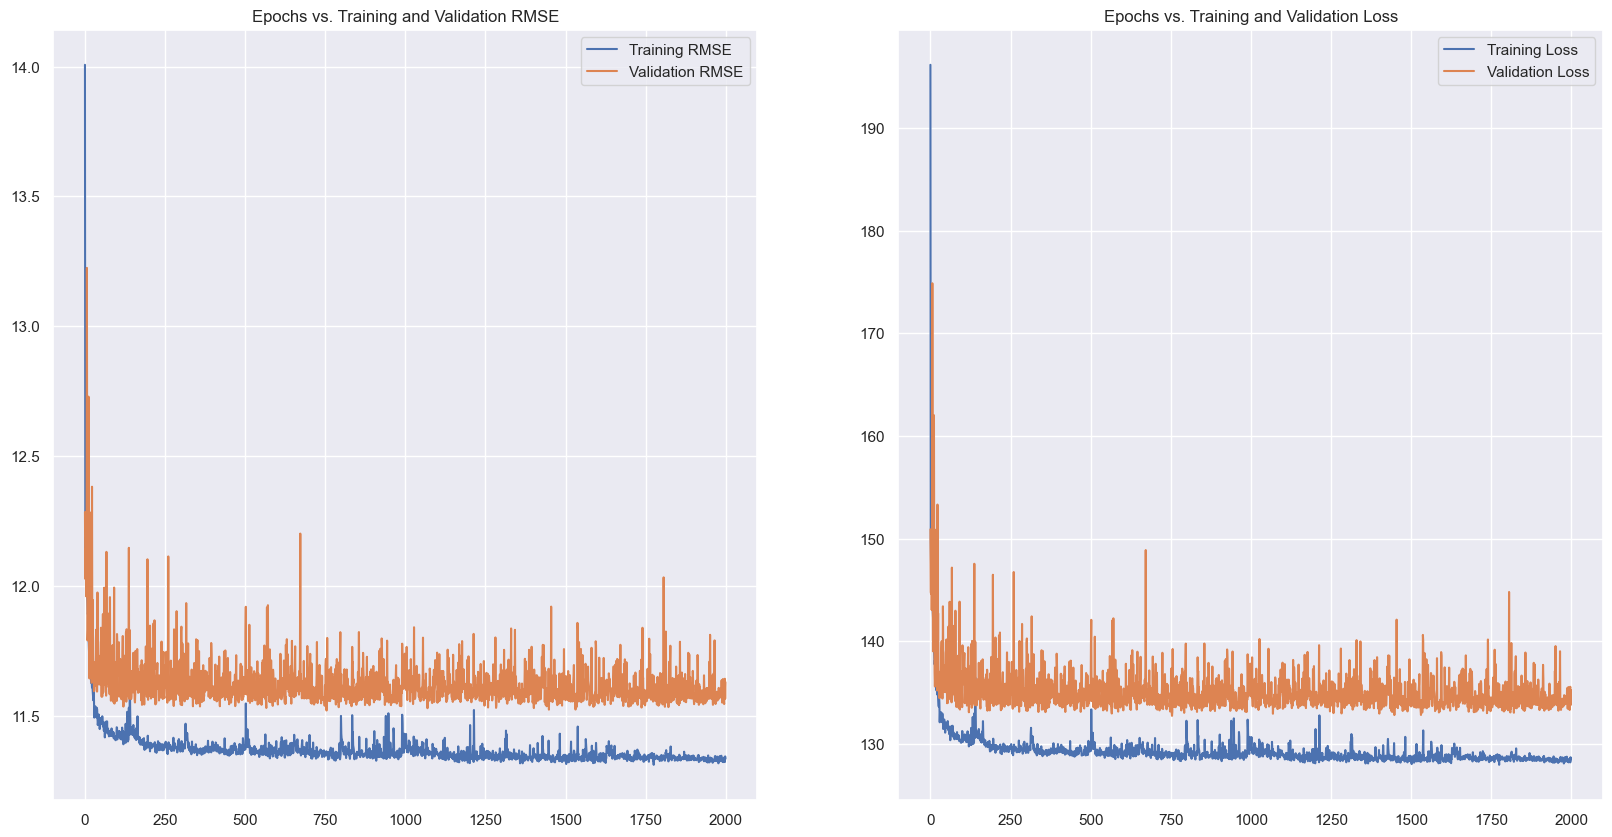

In [52]:
plot_model_rmse_and_loss(ann_history)


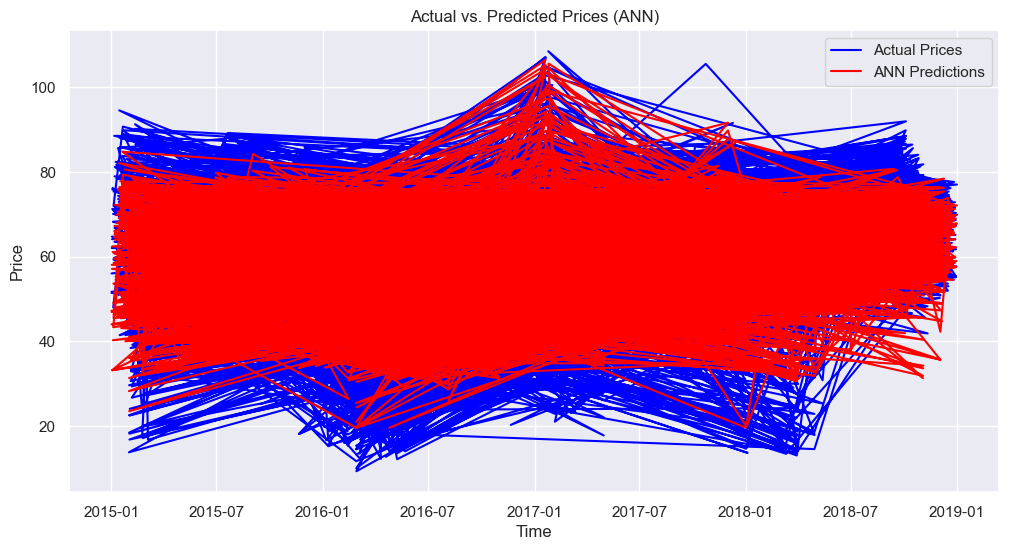

In [64]:
# Visualize actual vs. predicted prices for the best model
plt.figure(figsize=(12, 6))
if best_model_name == 'ANN':
    predictions = ann_predictions
elif best_model_name == 'Random Forest':
    predictions = rf_predictions
elif best_model_name == 'Decision Tree':
    predictions = dt_predictions
else:
    predictions = knn_predictions
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, predictions, label=f'{best_model_name} Predictions', color='red')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'Actual vs. Predicted Prices ({best_model_name})')
plt.legend()
plt.show()

In [68]:
ann_predictions = ann_model.predict(X_test_scaled)

# In case you scaled X_test as you did with X_train, use the scaled X_test

# Compare predicted values to actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})

# Print the comparison DataFrame
print(comparison)

220/220 [==============================] - 0s 1ms/step
                           Actual  Predicted
time                                        
2015-09-10 21:00:00+00:00   65.66    63.6138
2018-09-20 07:00:00+00:00   81.89    70.4540
2016-01-04 13:00:00+00:00   49.84    43.3895
2015-03-03 18:00:00+00:00   83.80    61.8050
2015-06-25 18:00:00+00:00   73.15    66.6371
...                           ...        ...
2018-07-07 16:00:00+00:00   64.38    58.7910
2016-10-07 17:00:00+00:00   68.80    63.4393
2017-07-14 09:00:00+00:00   62.98    71.1293
2015-11-27 03:00:00+00:00   41.12    49.4293
2016-02-20 10:00:00+00:00   42.02    56.6231

[7013 rows x 2 columns]


In [67]:
from sklearn.metrics import r2_score

# Calculate the R-squared (coefficient of determination) for your predictions
r2 = r2_score(y_test, ann_predictions)

# Convert R-squared to a percentage
r2_percentage = r2 * 100

# Print the R-squared as a percentage
print(f"R-squared: {r2_percentage:.2f}%")

R-squared: 58.08%


In [66]:
from tensorflow import keras

# Load the .h5 model file
model = keras.models.load_model('ANN_model.h5')

# Example input data (replace with your actual input data)
input_data = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

# Reshape the input data if needed (adjust the shape to match the model's input)
input_data = [input_data]  # Add an extra dimension if the model expects a batch size

# Make predictions
predictions = model.predict(input_data)

# Display the predictions
print(predictions)


1/1 [==============================] - 0s 90ms/step
[[323.37137]]
